# **Bangkit Capstone Project**

Theme : Economic Resilience

Main Goal : Provide cloud service which can forecast future sales/demand for each product using RandomForestRegressor

Purpose : The purpose of this service is to help IKM(Industri Kecil Menengah) Especially IKM in culinary business to reduce deadstock / to maximize warehousing capacity by looking our forecasting result on each product as a references for restocking process.

Dataset: https://www.kaggle.com/ghoshsaptarshi/av-genpact-hack-dec2018


## **Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

## **Acquiring Data**

In [ ]:
! chmod 600 kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download ghoshsaptarshi/av-genpact-hack-dec2018

  0% 0.00/5.68M [00:00<?, ?B/s]
100% 5.68M/5.68M [00:00<00:00, 94.1MB/s]


In [ ]:
mkdir datasets

mkdir: cannot create directory ‘datasets’: File exists


In [ ]:
import zipfile
with zipfile.ZipFile('av-genpact-hack-dec2018.zip','r') as f:
  f.extractall('/content/datasets/')

## **Data Preparation**

**Loading Dataset into DataFrame**

In [ ]:
train_df = pd.read_csv('/content/datasets/train.csv')

In [ ]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [ ]:
meal_info = pd.read_csv('/content/datasets/meal_info.csv')

In [ ]:
meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [ ]:
fulfillment_center_df = pd.read_csv('/content/datasets/fulfilment_center_info.csv')

In [ ]:
fulfillment_center_df

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [ ]:
train_df = pd.merge(train_df,meal_info, on='meal_id',how='inner')

In [ ]:
train_df = pd.merge(train_df, fulfillment_center_df, on='center_id',how='inner')

In [ ]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


## **Data Preprocessing**

In [ ]:
train_df = train_df[train_df['center_id'] == 13]

In [ ]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
29202,1171094,1,13,1885,135.86,122.28,0,1,2132,Beverages,Thai,590,56,TYPE_B,6.7
29203,1295835,2,13,1885,135.86,121.28,0,1,1891,Beverages,Thai,590,56,TYPE_B,6.7
29204,1429724,3,13,1885,133.86,122.28,0,1,2067,Beverages,Thai,590,56,TYPE_B,6.7
29205,1197234,4,13,1885,134.86,122.28,0,1,2472,Beverages,Thai,590,56,TYPE_B,6.7
29206,1469105,5,13,1885,143.56,120.28,0,1,1863,Beverages,Thai,590,56,TYPE_B,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36243,1489901,141,13,2104,591.73,590.73,0,0,176,Fish,Continental,590,56,TYPE_B,6.7
36244,1116247,142,13,2104,590.73,591.73,0,0,122,Fish,Continental,590,56,TYPE_B,6.7
36245,1289751,143,13,2104,592.73,591.73,0,0,177,Fish,Continental,590,56,TYPE_B,6.7
36246,1477207,144,13,2104,591.73,592.73,0,0,109,Fish,Continental,590,56,TYPE_B,6.7


In [ ]:
train_df = train_df[train_df['cuisine'] == 'Italian']

In [ ]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
30069,1005971,1,13,1778,184.36,182.36,0,0,513,Beverages,Italian,590,56,TYPE_B,6.7
30070,1355259,2,13,1778,183.33,184.33,0,0,513,Beverages,Italian,590,56,TYPE_B,6.7
30071,1448813,3,13,1778,184.33,183.33,0,0,702,Beverages,Italian,590,56,TYPE_B,6.7
30072,1138877,4,13,1778,182.39,182.39,0,0,837,Beverages,Italian,590,56,TYPE_B,6.7
30073,1379542,5,13,1778,183.39,181.39,0,0,474,Beverages,Italian,590,56,TYPE_B,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36043,1259802,141,13,2490,254.14,254.14,0,0,406,Salad,Italian,590,56,TYPE_B,6.7
36044,1444866,142,13,2490,284.21,285.21,0,0,445,Salad,Italian,590,56,TYPE_B,6.7
36045,1143136,143,13,2490,285.21,286.21,0,0,351,Salad,Italian,590,56,TYPE_B,6.7
36046,1039899,144,13,2490,290.03,290.03,0,0,323,Salad,Italian,590,56,TYPE_B,6.7


In [ ]:
train_df = train_df[train_df['category'] == 'Beverages']

In [ ]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
30069,1005971,1,13,1778,184.36,182.36,0,0,513,Beverages,Italian,590,56,TYPE_B,6.7
30070,1355259,2,13,1778,183.33,184.33,0,0,513,Beverages,Italian,590,56,TYPE_B,6.7
30071,1448813,3,13,1778,184.33,183.33,0,0,702,Beverages,Italian,590,56,TYPE_B,6.7
30072,1138877,4,13,1778,182.39,182.39,0,0,837,Beverages,Italian,590,56,TYPE_B,6.7
30073,1379542,5,13,1778,183.39,181.39,0,0,474,Beverages,Italian,590,56,TYPE_B,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30499,1024534,141,13,2707,228.92,230.92,0,0,1889,Beverages,Italian,590,56,TYPE_B,6.7
30500,1331377,142,13,2707,233.83,233.83,0,0,1743,Beverages,Italian,590,56,TYPE_B,6.7
30501,1240588,143,13,2707,238.62,239.62,0,0,1782,Beverages,Italian,590,56,TYPE_B,6.7
30502,1492371,144,13,2707,230.86,231.86,0,0,2012,Beverages,Italian,590,56,TYPE_B,6.7


In [ ]:
meal_id_unique = train_df['meal_id'].unique()
for x in meal_id_unique:
  print("Meal Id : {}, Total : {}".format(x, len(train_df[train_df['meal_id'] == x])))

Meal Id : 1778, Total : 145
Meal Id : 1062, Total : 145
Meal Id : 2707, Total : 145


In [ ]:
train_df = train_df[:145]

In [ ]:
len(train_df['num_orders'])

145

In [ ]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
30069,1005971,1,13,1778,184.36,182.36,0,0,513,Beverages,Italian,590,56,TYPE_B,6.7
30070,1355259,2,13,1778,183.33,184.33,0,0,513,Beverages,Italian,590,56,TYPE_B,6.7
30071,1448813,3,13,1778,184.33,183.33,0,0,702,Beverages,Italian,590,56,TYPE_B,6.7
30072,1138877,4,13,1778,182.39,182.39,0,0,837,Beverages,Italian,590,56,TYPE_B,6.7
30073,1379542,5,13,1778,183.39,181.39,0,0,474,Beverages,Italian,590,56,TYPE_B,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30209,1069162,141,13,1778,190.12,191.12,0,0,905,Beverages,Italian,590,56,TYPE_B,6.7
30210,1217075,142,13,1778,190.15,190.15,0,0,959,Beverages,Italian,590,56,TYPE_B,6.7
30211,1291936,143,13,1778,194.06,194.06,0,0,1079,Beverages,Italian,590,56,TYPE_B,6.7
30212,1270426,144,13,1778,185.27,186.27,0,0,771,Beverages,Italian,590,56,TYPE_B,6.7


In [ ]:
train_df = train_df[:120]

In [ ]:
train_df.reset_index(inplace=True)

In [ ]:
train_df = train_df['num_orders']

In [ ]:
train_df

0       513
1       513
2       702
3       837
4       474
       ... 
115    1122
116     999
117     836
118     771
119     690
Name: num_orders, Length: 120, dtype: int64

In [ ]:
train_df = np.array(train_df, dtype=np.float32).reshape(-1,1)

In [ ]:
train_df

array([[ 513.],
       [ 513.],
       [ 702.],
       [ 837.],
       [ 474.],
       [ 823.],
       [ 933.],
       [ 256.],
       [1039.],
       [1122.],
       [1066.],
       [ 877.],
       [ 757.],
       [ 796.],
       [ 877.],
       [ 553.],
       [ 973.],
       [ 890.],
       [ 715.],
       [ 878.],
       [ 852.],
       [1365.],
       [1540.],
       [ 729.],
       [ 728.],
       [ 688.],
       [ 541.],
       [ 458.],
       [ 595.],
       [ 864.],
       [1405.],
       [1014.],
       [1485.],
       [ 960.],
       [ 595.],
       [ 931.],
       [ 581.],
       [ 567.],
       [ 501.],
       [ 567.],
       [ 703.],
       [ 771.],
       [ 865.],
       [ 823.],
       [ 782.],
       [ 782.],
       [1176.],
       [ 770.],
       [ 784.],
       [ 513.],
       [ 431.],
       [ 715.],
       [ 824.],
       [ 890.],
       [ 688.],
       [ 838.],
       [1431.],
       [ 879.],
       [1026.],
       [ 919.],
       [ 730.],
       [ 243.],
       [

In [ ]:
scaler = MinMaxScaler()
scaler = scaler.fit(train_df)
train_df = scaler.transform(train_df)

In [ ]:
train_df

array([[0.23982236],
       [0.23982236],
       [0.3797187 ],
       [0.4796447 ],
       [0.21095484],
       [0.469282  ],
       [0.55070317],
       [0.0495929 ],
       [0.6291636 ],
       [0.69059956],
       [0.6491487 ],
       [0.5092524 ],
       [0.42042932],
       [0.4492968 ],
       [0.5092524 ],
       [0.26943004],
       [0.5803108 ],
       [0.5188749 ],
       [0.3893412 ],
       [0.5099926 ],
       [0.4907476 ],
       [0.87046623],
       [0.9999999 ],
       [0.3997039 ],
       [0.39896372],
       [0.369356  ],
       [0.26054773],
       [0.19911176],
       [0.30051813],
       [0.49962988],
       [0.900074  ],
       [0.61065876],
       [0.9592893 ],
       [0.57068837],
       [0.30051813],
       [0.5492228 ],
       [0.29015544],
       [0.27979273],
       [0.23094004],
       [0.27979273],
       [0.38045892],
       [0.430792  ],
       [0.50037   ],
       [0.469282  ],
       [0.43893412],
       [0.43893412],
       [0.73056996],
       [0.430

In [ ]:
train_df = pd.DataFrame(train_df, columns=['num_orders'])

In [ ]:
train_df

,num_orders
0,0.239822
1,0.239822
2,0.379719
3,0.479645
4,0.210955
...,...
115,0.690600
116,0.599556
117,0.478905
118,0.430792


In [ ]:
train_df = train_df['num_orders']

In [ ]:
train_df

0      0.239822
1      0.239822
2      0.379719
3      0.479645
4      0.210955
         ...   
115    0.690600
116    0.599556
117    0.478905
118    0.430792
119    0.370836
Name: num_orders, Length: 120, dtype: float32

In [ ]:
# Creating Windowed Dataset
def windowed_data(dataframe, size, start, container):
  max_data = (len(dataframe) - 1)
  index = start
  iterate = True
  while(iterate):
    list_n = []
    if (index + size) <= max_data:
      list_n.append(dataframe[index : (index+size+1)])
      container.append(list_n[0])
      index += 1
    else : iterate = False

In [ ]:
x_train = []
windowed_data(train_df.values.tolist(), 13, 0, x_train)
x_train

[[0.2398223578929901,
  0.2398223578929901,
  0.37971869111061096,
  0.47964468598365784,
  0.21095484495162964,
  0.46928200125694275,
  0.5507031679153442,
  0.04959289729595184,
  0.6291636228561401,
  0.6905995607376099,
  0.64914870262146,
  0.5092524290084839,
  0.4204293191432953,
  0.4492968022823334],
 [0.2398223578929901,
  0.37971869111061096,
  0.47964468598365784,
  0.21095484495162964,
  0.46928200125694275,
  0.5507031679153442,
  0.04959289729595184,
  0.6291636228561401,
  0.6905995607376099,
  0.64914870262146,
  0.5092524290084839,
  0.4204293191432953,
  0.4492968022823334,
  0.5092524290084839],
 [0.37971869111061096,
  0.47964468598365784,
  0.21095484495162964,
  0.46928200125694275,
  0.5507031679153442,
  0.04959289729595184,
  0.6291636228561401,
  0.6905995607376099,
  0.64914870262146,
  0.5092524290084839,
  0.4204293191432953,
  0.4492968022823334,
  0.5092524290084839,
  0.2694300413131714],
 [0.47964468598365784,
  0.21095484495162964,
  0.46928200125694

In [ ]:
len(x_train)

107

In [ ]:
y_train = []
windowed_data(train_df.values.tolist(), 6, 14, y_train)

In [ ]:
y_train

[[0.5092524290084839,
  0.2694300413131714,
  0.5803108215332031,
  0.5188748836517334,
  0.38934120535850525,
  0.5099925994873047,
  0.4907476007938385],
 [0.2694300413131714,
  0.5803108215332031,
  0.5188748836517334,
  0.38934120535850525,
  0.5099925994873047,
  0.4907476007938385,
  0.8704662322998047],
 [0.5803108215332031,
  0.5188748836517334,
  0.38934120535850525,
  0.5099925994873047,
  0.4907476007938385,
  0.8704662322998047,
  0.9999998807907104],
 [0.5188748836517334,
  0.38934120535850525,
  0.5099925994873047,
  0.4907476007938385,
  0.8704662322998047,
  0.9999998807907104,
  0.39970389008522034],
 [0.38934120535850525,
  0.5099925994873047,
  0.4907476007938385,
  0.8704662322998047,
  0.9999998807907104,
  0.39970389008522034,
  0.39896371960639954],
 [0.5099925994873047,
  0.4907476007938385,
  0.8704662322998047,
  0.9999998807907104,
  0.39970389008522034,
  0.39896371960639954,
  0.3693560063838959],
 [0.4907476007938385,
  0.8704662322998047,
  0.999999880790

In [ ]:
len(y_train)

100

In [ ]:
x_train = np.array(x_train, dtype=np.float32)[:len(y_train)]
x_train

array([[0.23982236, 0.23982236, 0.3797187 , ..., 0.5092524 , 0.42042932,
        0.4492968 ],
       [0.23982236, 0.3797187 , 0.4796447 , ..., 0.42042932, 0.4492968 ,
        0.5092524 ],
       [0.3797187 , 0.4796447 , 0.21095484, ..., 0.4492968 , 0.5092524 ,
        0.26943004],
       ...,
       [0.3908216 , 0.3893412 , 0.4796447 , ..., 0.5588453 , 0.5588453 ,
        0.5203552 ],
       [0.3893412 , 0.4796447 , 0.4707624 , ..., 0.5588453 , 0.5203552 ,
        0.4492968 ],
       [0.4796447 , 0.4707624 , 0.20947447, ..., 0.5203552 , 0.4492968 ,
        0.4988897 ]], dtype=float32)

## **Modeling using RandomForestRegressor**

In [ ]:
hyperparameters = {
    'n_estimators' : [200, 400, 600],
    'min_samples_leaf' : [1, 2, 3, 4, 5],
    'min_samples_split' : [2, 4, 6, 8, 10],
}

In [ ]:
model_tuning = RandomForestRegressor()

In [ ]:
grid_rfr = GridSearchCV(
    model_tuning,
    hyperparameters
)

In [ ]:
grid_rfr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
model = RandomForestRegressor(n_estimators=500)

In [ ]:
x_train

array([[0.23982236, 0.23982236, 0.3797187 , ..., 0.5092524 , 0.42042932,
        0.4492968 ],
       [0.23982236, 0.3797187 , 0.4796447 , ..., 0.42042932, 0.4492968 ,
        0.5092524 ],
       [0.3797187 , 0.4796447 , 0.21095484, ..., 0.4492968 , 0.5092524 ,
        0.26943004],
       ...,
       [0.3908216 , 0.3893412 , 0.4796447 , ..., 0.5588453 , 0.5588453 ,
        0.5203552 ],
       [0.3893412 , 0.4796447 , 0.4707624 , ..., 0.5588453 , 0.5203552 ,
        0.4492968 ],
       [0.4796447 , 0.4707624 , 0.20947447, ..., 0.5203552 , 0.4492968 ,
        0.4988897 ]], dtype=float32)

In [ ]:
y_train

[[0.5092524290084839,
  0.2694300413131714,
  0.5803108215332031,
  0.5188748836517334,
  0.38934120535850525,
  0.5099925994873047,
  0.4907476007938385],
 [0.2694300413131714,
  0.5803108215332031,
  0.5188748836517334,
  0.38934120535850525,
  0.5099925994873047,
  0.4907476007938385,
  0.8704662322998047],
 [0.5803108215332031,
  0.5188748836517334,
  0.38934120535850525,
  0.5099925994873047,
  0.4907476007938385,
  0.8704662322998047,
  0.9999998807907104],
 [0.5188748836517334,
  0.38934120535850525,
  0.5099925994873047,
  0.4907476007938385,
  0.8704662322998047,
  0.9999998807907104,
  0.39970389008522034],
 [0.38934120535850525,
  0.5099925994873047,
  0.4907476007938385,
  0.8704662322998047,
  0.9999998807907104,
  0.39970389008522034,
  0.39896371960639954],
 [0.5099925994873047,
  0.4907476007938385,
  0.8704662322998047,
  0.9999998807907104,
  0.39970389008522034,
  0.39896371960639954,
  0.3693560063838959],
 [0.4907476007938385,
  0.8704662322998047,
  0.999999880790

In [ ]:
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
x_train[0].reshape(1,-1)

array([[0.23982236, 0.23982236, 0.3797187 , 0.4796447 , 0.21095484,
        0.469282  , 0.55070317, 0.0495929 , 0.6291636 , 0.69059956,
        0.6491487 , 0.5092524 , 0.42042932, 0.4492968 ]], dtype=float32)

In [ ]:
result = model.predict(x_train[0].reshape(1,-1))

In [ ]:
len(result[0])

7

In [ ]:
result

array([[0.47791119, 0.32411397, 0.5302531 , 0.49022648, 0.41782381,
        0.5144145 , 0.49664544]])

In [ ]:
result = scaler.inverse_transform(result)

In [ ]:
result

array([[834.65803075, 626.87798869, 905.37195652, 851.29599065,
        753.4799848 , 883.97400975, 859.96801338]])

In [ ]:
actual = scaler.inverse_transform(np.array(y_train[0]).reshape(1,-1))
actual

array([[877.00004994, 552.99999237, 972.99994173, 889.99998663,
        714.99998089, 878.00002029, 852.00002611]])

In [ ]:
mean_absolute_error(actual, result)

39.28199676119258

In [ ]:
grid_rfr.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 200}

In [ ]:
model = RandomForestRegressor(n_estimators=200, min_samples_leaf=2, min_samples_split=10, bootstrap=False, criterion='mae')

In [ ]:
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
result = model.predict(x_train[0].reshape(1,-1))

In [ ]:
result

array([[0.41006663, 0.26943004, 0.55884528, 0.52035522, 0.4492968 ,
        0.49888971, 0.4907476 ]])

In [ ]:
result = scaler.inverse_transform(result)

In [ ]:
result

array([[743.00003657, 552.99999237, 943.99999623, 891.99992734,
        795.99999528, 863.0000221 , 852.00002611]])

In [ ]:
actual

array([[877.00004994, 552.99999237, 972.99994173, 889.99998663,
        714.99998089, 878.00002029, 852.00002611]])

In [ ]:
mean_absolute_error(actual, result)

37.285701737248054

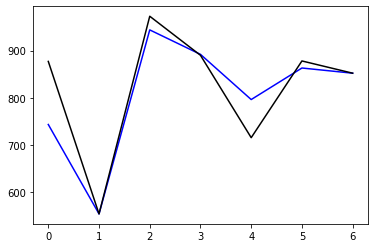

In [ ]:
import matplotlib.pyplot as plt

index = [x for x in range(0, 7)]
plt.plot(
    index,
    result[0],
    color='red'
)
plt.plot(
    index,
    actual[0],
    color='black'
)
plt.show()